In [1]:
%matplotlib inline
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import NMF 

In [2]:
currdir = os.getcwd()

datadir = os.path.abspath(os.path.join(currdir, '../../../'))

In [3]:
datafile = 'outputs/nmf/nearest-neighbor/nn_neighbors.csv'

df = pd.read_csv(os.path.join(datadir, datafile))

In [4]:
df

,player,index,nn1,nn2,nn3,nn4,nn5,player_dist,nn1_dist,nn2_dist,nn3_dist,nn4_dist,nn5_dist
0,A. Pasaol,0,65,43,15,28,33,0,0.00435,0.00444,0.00454,0.00474,0.00515
1,A. Melecio,1,61,5,22,3,18,0,0.00327,0.00387,0.00456,0.00505,0.00515
2,R. Subido,2,49,60,1,22,74,0,0.00429,0.00604,0.00631,0.00641,0.00730
3,D. Ildefonso,3,7,5,43,63,9,0,0.00219,0.00405,0.00420,0.00461,0.00476
4,J. Ahanmisi,4,19,42,17,78,46,0,0.00731,0.00753,0.00773,0.00878,0.00897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,F. Jaboneta,77,21,47,40,30,33,0,0.00962,0.00982,0.01011,0.01119,0.01129
78,I. Batalier,78,17,67,11,63,64,0,0.00624,0.00631,0.00781,0.00831,0.00841
79,C. Vito,79,40,7,74,10,3,0,0.00248,0.00464,0.00501,0.00517,0.00532
80,S. Akomo,80,53,6,54,68,72,0,0.00060,0.00085,0.00093,0.00156,0.00471


In [5]:
# DataFrame of player and nearest neighbor (indices)
df_nn = df[['player', 'index', 'nn1', 'nn2', 'nn3', 'nn4', 'nn5']]
# df_nn

In [6]:
# DataFrame of player and nearest neighbor (distances)
df_dist = df[['player', 'index', 'nn1_dist', 'nn1_dist', 'nn1_dist', 'nn1_dist', 'nn1_dist']]
# df_dist

In [7]:
# DataFrame of player average distance of 5 NN
df_avedist = pd.concat([df[['player', 'index']], df[['nn1_dist', 'nn1_dist', 'nn1_dist', 'nn1_dist', 'nn1_dist']].mean(axis=1)], axis=1, join="inner")
df_avedist.columns = ['player', 'index', 'ave_dist']

In [8]:
# List of player neighbors
p_neighbors = []

for i in range(df_nn.shape[0]):
    neighbors = df_nn[df_nn.player==df_nn['player'][i]][['nn1', 'nn2', 'nn3', 'nn4', 'nn5']].values.tolist()[0]
    player = df_nn[df_nn.player==df_nn['player'][i]].player.values[0]
#     sym_neighbors = []
    for j in range(df_nn.shape[0]):
        if i in df_nn[df_nn.player==df_nn['player'][j]][['nn1', 'nn2', 'nn3', 'nn4', 'nn5']].values:
            neighbors.append(j)
    p_neighbors.append([i,player,list(set(neighbors))])

# p_neighbors

In [9]:
# DataFrame of player neighbors
df_neighbors = pd.DataFrame(p_neighbors, columns=['index', 'player', 'neighbors'])

In [10]:
df_neighbors
# np.savetxt('neighbors.csv', df_neighbors.neighbors)

,index,player,neighbors
0,0,A. Pasaol,"[65, 33, 43, 14, 15, 25, 26, 28]"
1,1,A. Melecio,"[2, 3, 5, 75, 17, 18, 19, 22, 61]"
2,2,R. Subido,"[1, 37, 74, 42, 46, 49, 22, 60]"
3,3,D. Ildefonso,"[1, 33, 34, 5, 7, 40, 9, 43, 79, 30, 63]"
4,4,J. Ahanmisi,"[42, 44, 46, 78, 17, 19]"
...,...,...,...
77,77,F. Jaboneta,"[33, 40, 47, 21, 30]"
78,78,I. Batalier,"[64, 67, 4, 11, 44, 17, 59, 63]"
79,79,C. Vito,"[3, 7, 40, 74, 10]"
80,80,S. Akomo,"[68, 6, 72, 16, 53, 54]"


In [11]:
s_nn = pd.Series(df_neighbors.neighbors.values, index=df_neighbors.index)

In [12]:
# def ave_dist(index, neighbors, df=df):
#     nns = df[['index', 'nn1', 'nn2', 'nn3', 'nn4', 'nn5']]
#     for n in neighbors:
#         print(nns[['nn1', 'nn2', 'nn3', 'nn4', 'nn5']][nns.index==index].values)
#         if index in nns[['nn1', 'nn2', 'nn3', 'nn4', 'nn5']][nns.index==index].values:
#             print(index, nns[nns.index==index].values)

In [13]:
# df_nns = df[['index','nn1', 'nn2', 'nn3', 'nn4', 'nn5']]
# df_nns[df_nns.index==0]

In [17]:
# df_neighbors[['player', 'neighbors']].to_csv('neighbors.csv')

In [33]:
df_plot = pd.read_csv(os.path.join(datadir, 'outputs/nmf/nearest-neighbor/neighbors_num_dist_fga.csv'))

In [34]:
df_plot

,player,num,ave_dist,fga
0,A. Pasaol,8,0.005054,294
1,A. Melecio,9,0.005283,203
2,R. Subido,8,0.007133,197
3,D. Ildefonso,11,0.004788,195
4,J. Ahanmisi,6,0.008448,194
...,...,...,...,...
77,F. Jaboneta,5,0.010405,31
78,I. Batalier,8,0.008140,31
79,C. Vito,5,0.004525,30
80,S. Akomo,6,0.002298,28


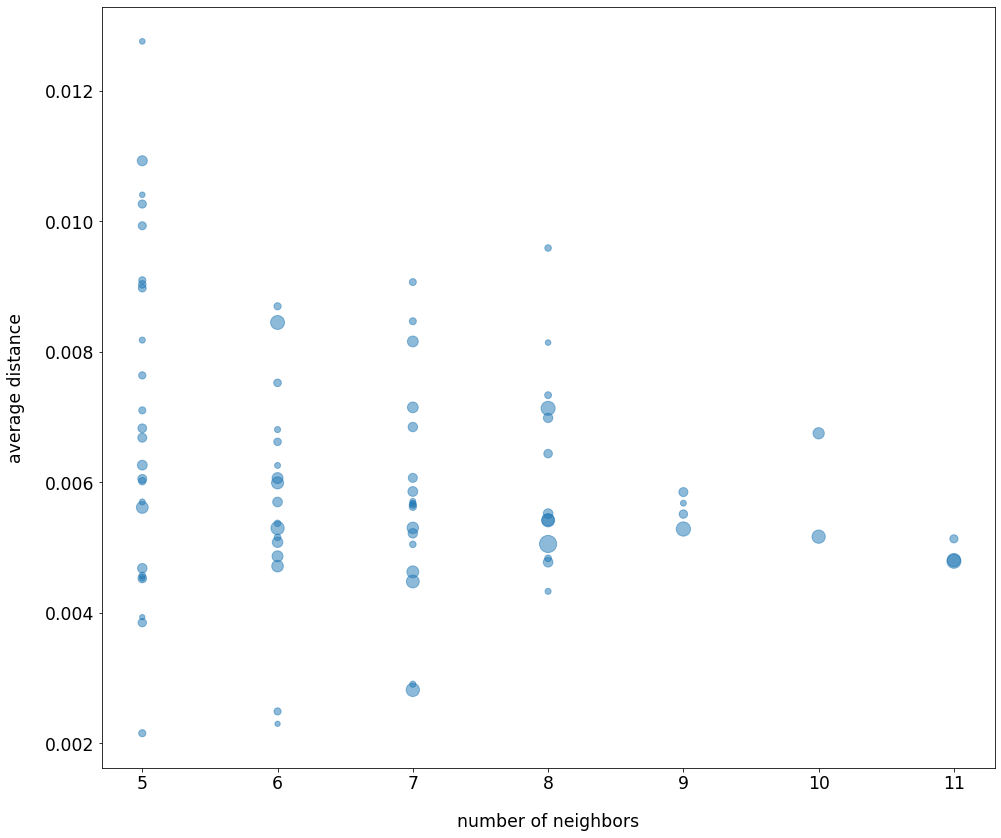

In [74]:
plt.figure(figsize=(16,14))
# f1.set_tight_layout(True)

plt.scatter(df_plot.num, df_plot.ave_dist, s=df_plot.fga, alpha=0.5)
plt.xlabel('number of neighbors', fontsize='xx-large', labelpad=20)
plt.ylabel('average distance', fontsize='xx-large', labelpad=20)
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')

plt.savefig('neighbors-v-distance')

plt.show()